## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [721]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

King County House Sales dataset.<br>

**id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [722]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv')

In [723]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [725]:
df.shape

(21597, 21)

In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [727]:
df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


#### Null Values
Columns: waterfront, view and yr_renovated has NaN values.<br>

In [728]:
df.columns
df_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [729]:
df_housing = df[df_cols]

In [730]:
df_housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [731]:
df_housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [732]:
#do any rows have duplicate data.
duplicates = df_housing[df_housing.duplicated()]
print(len(duplicates))

0


In [733]:
#missing values
# waterfront 2376   11%
#view        63     0.2%
# yr_renovated 3842 17.789%
df_housing.isnull().sum() * 100/ len(df_housing)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [734]:
#waterfront - House which has a view to a waterfront
print(df_housing['waterfront'].value_counts(dropna=False) )
print('---------')
print(df_housing['waterfront'].value_counts(dropna=False) * 100 / len(df_housing['waterfront']))

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64
---------
0.0    88.322452
NaN    11.001528
1.0     0.676020
Name: waterfront, dtype: float64


In [735]:
df_housing['waterfront'].unique()

array([nan,  0.,  1.])

In [736]:
print(df_housing.shape)
print(df_housing['waterfront'].isnull().sum())

(21597, 21)
2376


In [737]:
try:
    fill_col = ['waterfront']
    df_housing['waterfront'].fillna(value=df_housing['waterfront'].mode()[0], inplace=True)
except:
    print("'waterfront' not in the dataframe.")        

In [738]:
df_housing['waterfront'].isnull().sum()

0

In [739]:
# 21,597
df_housing['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [740]:
#years renovated
#yr_renovated 
#it looks like the majority of homes weren't renovated or 78% of variable
print(df_housing['yr_renovated'].value_counts(dropna=False))
print('---------------')
print(df_housing['yr_renovated'].value_counts(dropna=False) *100 / len(df_housing['yr_renovated']))

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64
---------------
0.0       78.765569
NaN       17.789508
2014.0     0.338010
2003.0     0.143538
2013.0     0.143538
            ...    
1944.0     0.004630
1948.0     0.004630
1976.0     0.004630
1934.0     0.004630
1953.0     0.004630
Name: yr_renovated, Length: 71, dtype: float64


In [741]:
df_housing['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [742]:
try:
    df_housing['yr_renovated'].fillna(value= df_housing['yr_renovated'].mode()[0], inplace=True)
except:
    print('not in the dataframe.')   

In [743]:
df_housing['yr_renovated'].value_counts() 

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [744]:
df_housing['yr_renovated'].isnull().sum()

0

The column 'view' has NaNs, but they only make up 1% (0.291707) of independent variable so I'm going to drop it.

In [745]:
try:
    df_housing = df_housing.dropna(subset=['view'])
except:
    print('not in the dataframe.')  

In [746]:
df_housing['view'].isnull().sum()

0

In [747]:
df_housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Convert Object Datatypes
The columns date and sqft_basement are considered objects and need to be numeric datatypes so the statsmodel will take them as inputs.<br>

In [748]:
numeric_data = df_housing.select_dtypes(include=[np.number])
cat_data = df_housing.select_dtypes(exclude=[np.number])
print ("There are {} numeric columns and {} categorical columns in the housing data set".format(numeric_data.shape[1],cat_data.shape[1]))

There are 19 numeric columns and 2 categorical columns in the housing data set


In [749]:
df_housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [750]:
df_housing.loc[:, df_housing.dtypes == object]

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


In [751]:
#sqft_basement - square footage of the basement
df_housing['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
2580.0        1
946.0         1
243.0         1
207.0         1
588.0         1
Name: sqft_basement, Length: 302, dtype: int64

The column 'sqft_basement' also has the issue that 2% of the data has a value of '?', this must be addressed before 
variable.<br> 

In [752]:
df_housing['sqft_basement'].value_counts() *100 / len(df_housing['sqft_basement'])

0.0       59.431597
?          2.099006
600.0      1.003065
500.0      0.970558
700.0      0.961271
            ...    
2580.0     0.004644
946.0      0.004644
243.0      0.004644
207.0      0.004644
588.0      0.004644
Name: sqft_basement, Length: 302, dtype: float64

In [753]:
try:
    df_housing["sqft_basement"] = df_housing["sqft_basement"].replace('?', '0.0')
except:
    print('not in the dataframe.')  

In [754]:
df_housing['sqft_basement'].value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
2580.0        1
946.0         1
243.0         1
207.0         1
588.0         1
Name: sqft_basement, Length: 301, dtype: int64

In [755]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [756]:
df_housing['sqft_basement']  = df_housing['sqft_basement'].astype('float64')

In [757]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.6+ MB


#### Convert date
Column 'date' is an object and needs to converted to int data type so that it can used.  Can't do a statistical analysis with method .describe() on an abject.  The Statmodel won't accept a datetime data type.  I created a new column 'age_house' so be more specific of how particluar house was.<br>

In [758]:
#date = df_housing['date'][0]
#date
def get_year(x):
    
    yr = x[-4:]
    return int(yr)

In [759]:
# df_housing['date'] = pd.to_datetime(df_housing['date'])
df_housing['year'] = df_housing['date'].apply(lambda x:get_year(x))
df_housing['age_house']= df_housing['year']-df_housing['yr_built']
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28


In [760]:
df_housing[['yr_built','date','year','age_house']]

,yr_built,date,year,age_house
0,1955,10/13/2014,2014,59
1,1951,12/9/2014,2014,63
2,1933,2/25/2015,2015,82
3,1965,12/9/2014,2014,49
4,1987,2/18/2015,2015,28
...,...,...,...,...
21592,2009,5/21/2014,2014,5
21593,2014,2/23/2015,2015,1
21594,2009,6/23/2014,2014,5
21595,2004,1/16/2015,2015,11


There is a linear relationship between columns 'age_house' and 'price'.  However, there are outliers as evidenced by data points which are <br> 

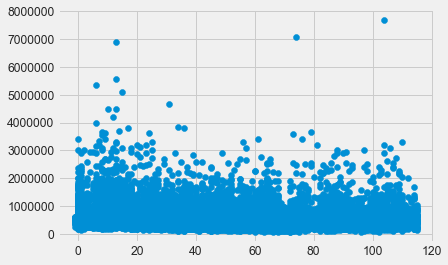

In [761]:
plt.scatter(df_housing['age_house'], df_housing['price'])

Columns 'age' and 'age_house' have the correct int data types.<br>

In [762]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 23 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
year             21534 non-null int64
age_house        21534 non-null int6

In [763]:
df_housing.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63


In [764]:
#date doesn't show up
df_housing.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
count,2.153400e+04,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,4.582351e+09,540057.664,3.373,2.116,2079.828,15090.596,1.494,0.007,0.234,3.410,7.657,1788.558,285.244,1971.002,68.867,98077.939,47.560,-122.214,1986.300,12751.080,2014.323,43.320
std,2.876779e+09,366059.581,0.926,0.769,917.447,41380.210,0.540,0.082,0.766,0.651,1.173,827.746,439.334,29.376,364.315,53.507,0.139,0.141,685.121,27255.483,0.467,29.378
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014.000,-1.000
25%,2.123212e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014.000,18.000
50%,3.904945e+09,450000.000,3.000,2.250,1910.000,7617.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000,2014.000,40.000
75%,7.312175e+09,645000.000,4.000,2.500,2550.000,10687.750,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015.000,63.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,2015.000,115.000


### Independent variables that are categorical

In [765]:
df_housing['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [766]:
df_housing['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [767]:
df_housing['floors'].value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [768]:
df_housing['waterfront'].value_counts()

0.0    21389
1.0      145
Name: waterfront, dtype: int64

In [769]:
#view-has been viewed
df_housing['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [770]:
#condition - How good the condition is (Overall)
df_housing['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [771]:
#yr_renovated - Year when house was renovated
#96% of homes weren't renovated
print(df_housing['yr_renovated'].value_counts())
print('----------------')
print(df_housing['yr_renovated'].value_counts() *100/ len(df_housing['yr_renovated']))

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64
----------------
0.0       96.549642
2014.0     0.338999
2003.0     0.143958
2013.0     0.143958
2007.0     0.139315
            ...    
1946.0     0.004644
1959.0     0.004644
1971.0     0.004644
1951.0     0.004644
1954.0     0.004644
Name: yr_renovated, Length: 70, dtype: float64


In [772]:
df_housing['zipcode'].value_counts()

98103    601
98038    586
98115    580
98052    573
98117    553
        ... 
98102    104
98010    100
98024     79
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [773]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house'],
      dtype='object')

In [774]:
#pd.plotting.scatter_matrix(df_housing, figsize=(14,14));

### Target
The target variable is skewed.<br>
There are a lot of outliers.<br>

In [775]:
len(df_housing['price'].unique())

3613

In [776]:
df_housing['price'].describe().round(3)

count      21534.000
mean      540057.664
std       366059.581
min        78000.000
25%       322000.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

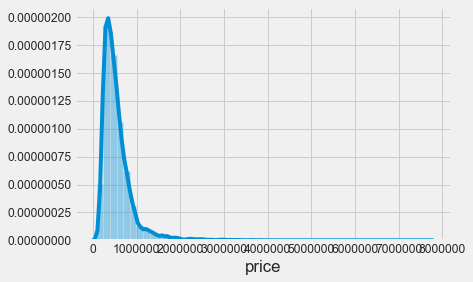

In [777]:
sns.distplot(df_housing['price']);

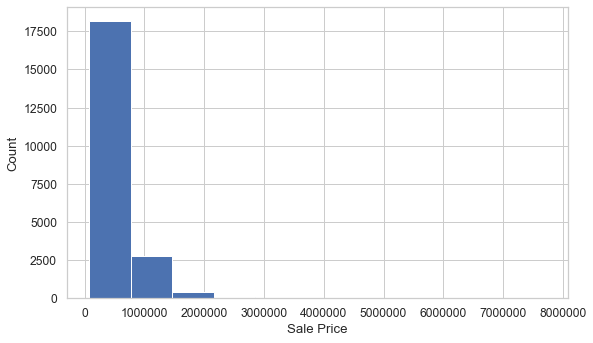

In [778]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_housing['price'], norm_hist=False, kde=False, bins=11, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

The boxplot shows that there are a lot of outliers in the 'price'/target column.

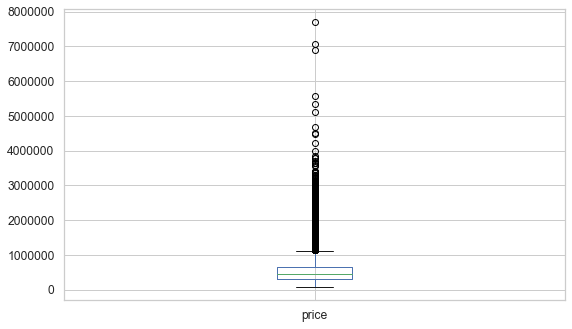

In [779]:
df_housing['price'].plot(kind='box');

I didn't create a new column for price but for sole visual purposes I did create bins according to the statistical breakdown of method .describe().  The largest number of homes are in the price range of 440,000 to 640,000.<br>  

In [780]:
bins = [78000, 320000,440000,640000,700000]
bins_price = pd.cut(df_housing['price'], bins)
bins_price = bins_price.cat.as_ordered()
bins_price.head()

0     (78000, 320000]
1    (440000, 640000]
2     (78000, 320000]
3    (440000, 640000]
4    (440000, 640000]
Name: price, dtype: category
Categories (4, interval[int64]): [(78000, 320000] < (320000, 440000] < (440000, 640000] < (640000, 700000]]

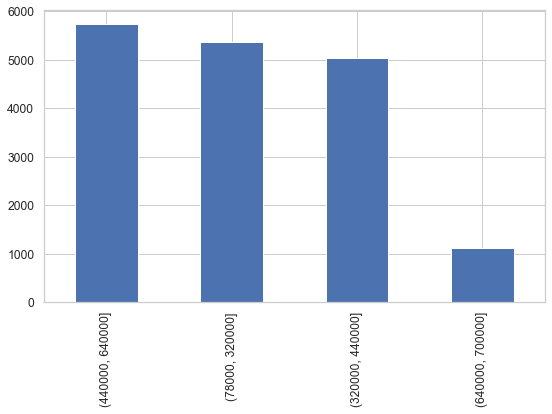

In [781]:
bins_price.value_counts().plot(kind='bar')

### Dealing with Categorical Variables<br>
The independent variables that would be considered categorical are numeric so we don't have to worry about converting them to numeric data types.<br>
Probably would be easier to work with them if broken up into bins.<br>
Column 'zipcode' is a categorical variable but I won't create bins because it would make no sense.<br>

In [782]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house'],
      dtype='object')

In [783]:
df_housing[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','yr_built',
            'yr_renovated','zipcode']].nunique()

bedrooms         12
bathrooms        29
floors            6
waterfront        2
view              5
condition         5
grade            11
yr_built        116
yr_renovated     70
zipcode          70
dtype: int64

In [784]:
df_housing['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [785]:
df_housing['zipcode'].value_counts()

98103    601
98038    586
98115    580
98052    573
98117    553
        ... 
98102    104
98010    100
98024     79
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

bathrooms sounds like it generally would be categorcial, i.e., 1, 2 or 3 bathrooms, but there are lots of variations to this column so I will apply hte labelencoder.<br>

In [786]:
df_housing['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [787]:
df_housing['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

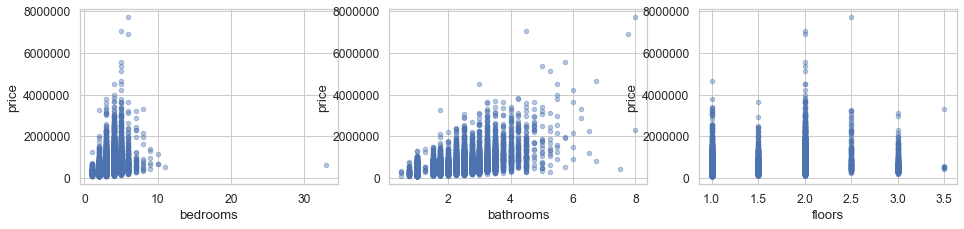

In [788]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))

for xcol, ax in zip(['bedrooms','bathrooms','floors'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

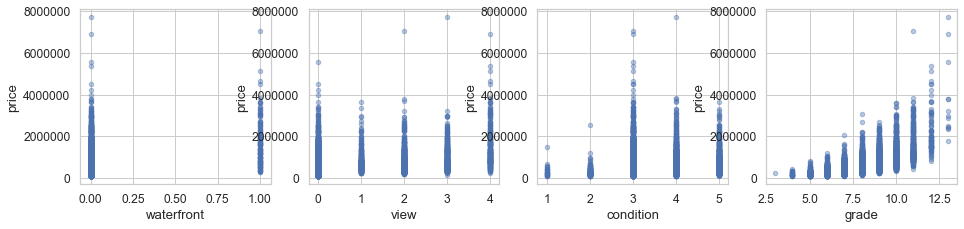

In [789]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))

for xcol, ax in zip(['waterfront','view', 'condition', 'grade'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

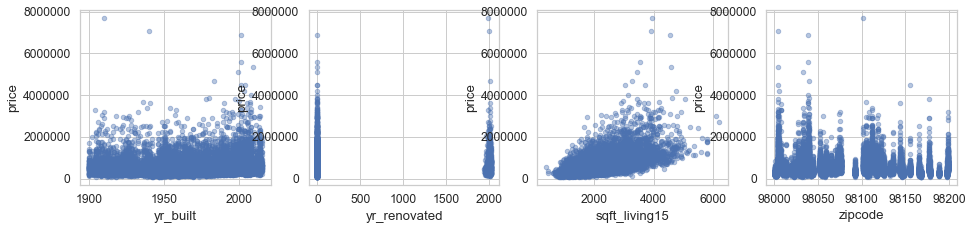

In [790]:
#'yr_built','yr_renovated'
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))

for xcol, ax in zip(['yr_built','yr_renovated','sqft_living15','zipcode'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

yr_built and yr_renovated have vertical looking structures instrad of cloud like.<br>
There doesn't seem to be a linear looking relationship between predcitor variables and target.<br>  
<br>
The following columns are already categorcial form: bedrooms, floors, waterfront, view, condition, grade.<br>
It makes sense to structure data into bins so they are treated as categorcial variables.<br>

In [791]:
df_housing_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_categories = df_housing[df_housing_cols]

In [792]:
df_categories.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [793]:
df_categories['yr_built'].describe()

count    21534.000000
mean      1971.002275
std         29.376044
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

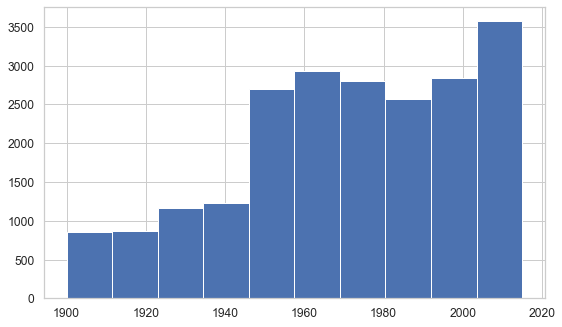

In [794]:
df_categories['yr_built'].hist();

In [795]:
bins=[1890,1950,1974,1996,2016]
bins_yr_built = pd.cut(df_categories['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_ordered()
bins_yr_built.head()

0    (1950, 1974]
1    (1950, 1974]
2    (1890, 1950]
3    (1950, 1974]
4    (1974, 1996]
Name: yr_built, dtype: category
Categories (4, interval[int64]): [(1890, 1950] < (1950, 1974] < (1974, 1996] < (1996, 2016]]

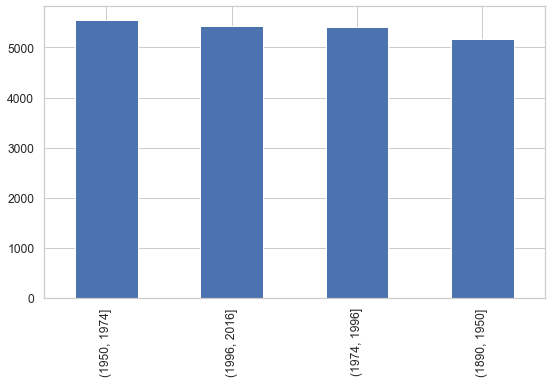

In [796]:
bins_yr_built.value_counts().plot(kind='bar');

In [797]:
df_categories['yr_built']= bins_yr_built
df_categories['yr_built'] = df_categories['yr_built'].cat.codes

In [798]:
df_categories['yr_built'].value_counts()

1    5540
3    5422
2    5404
0    5168
Name: yr_built, dtype: int64

In [799]:
df_categories.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1,1991.0,98125,47.7210,-122.319,1690,7639


In [800]:
df_categories['yr_renovated'].describe()

count    21534.000000
mean        68.866722
std        364.314552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

Column 'yr_renovated' is a problem b/c the majority of problems have been renovated, so it's easier to just group them in terms
of properties that haven't been renovated (0) and those that have(1).<br>

In [801]:
df_categories['yr_renovated'].value_counts()

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

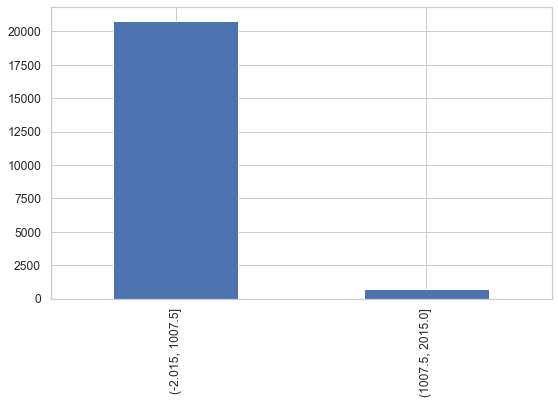

In [802]:
bins_yr_renovated = pd.cut(df_categories['yr_renovated'], 2)
bins_yr_renovated.value_counts().plot(kind='bar');

In [803]:
df_categories['yr_renovated']= bins_yr_renovated
df_categories['yr_renovated'] = abs(df_categories['yr_renovated'].cat.codes)

In [804]:
#0 is didn't renovate
df_categories['yr_renovated']. value_counts()

0    20791
1      743
Name: yr_renovated, dtype: int64

In [805]:
#yr_built
#yr_renovated
df_housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,2014,19
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,2015,55
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,2015,12
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,2015,50


In [806]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 23 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
year             21534 non-null int64
age_house        21534 non-null int6

In [807]:
df_housing['waterfront'].isnull().sum()

0

### Collinearity

In [808]:
def multiplot(corr,figsize=(25,10)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True, mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax


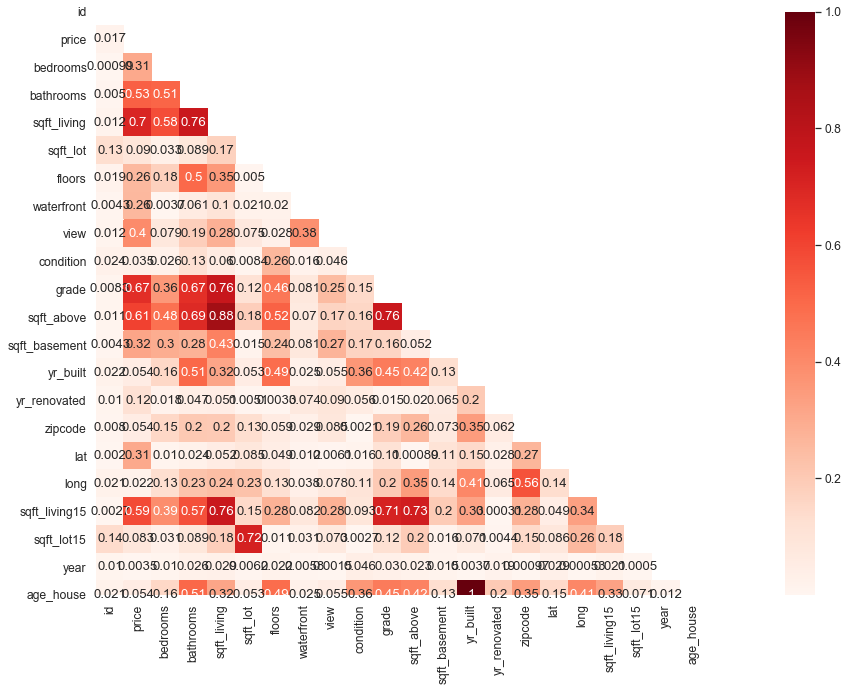

In [809]:
multiplot(np.abs(df_housing.corr()));

In [810]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house'],
      dtype='object')

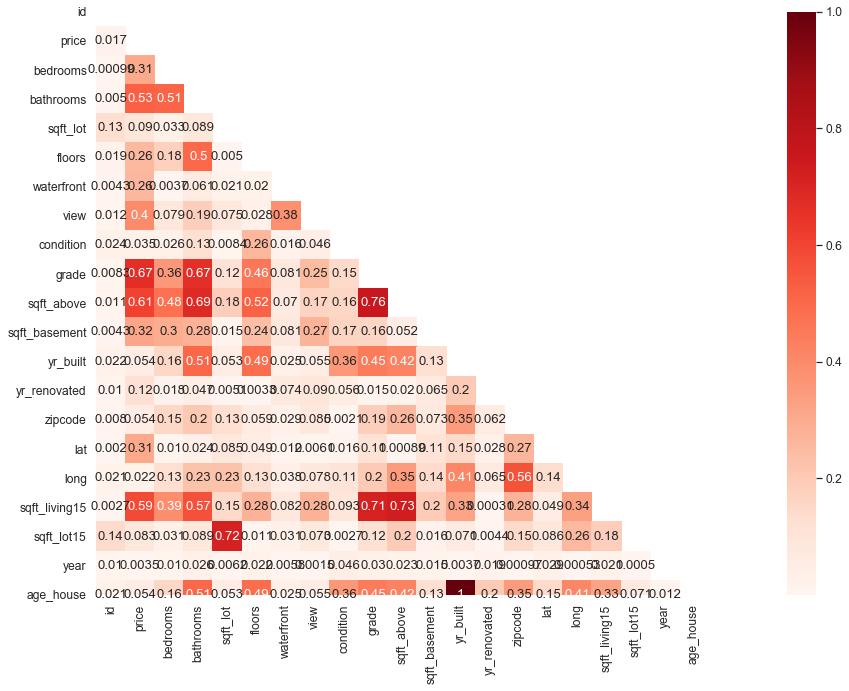

In [811]:
#--only sqft_living was deleted 11/13/19

#sqft_living and bathrooms = bathrooms=0.76 / cut bathrooms didn't
#grade and sqft_living=0.76  / cut grade - didn't
#sqft_above and sqfit_living = 0.88 / cut sqft_living
#sqft_above and grade = 0.76 / sqft_above
colli_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 
              'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year','age_house']

collin_df = df_housing[colli_cols]
multiplot(np.abs(collin_df.corr()));

### Linearity

In [812]:
collin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
year             21534 non-null int64
age_house        21534 non-null int64
dtypes: float64(9), int64(12), objec

In [813]:
# yr_built = category
# yr_renovated = category
collin_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'age_house'],
      dtype='object')

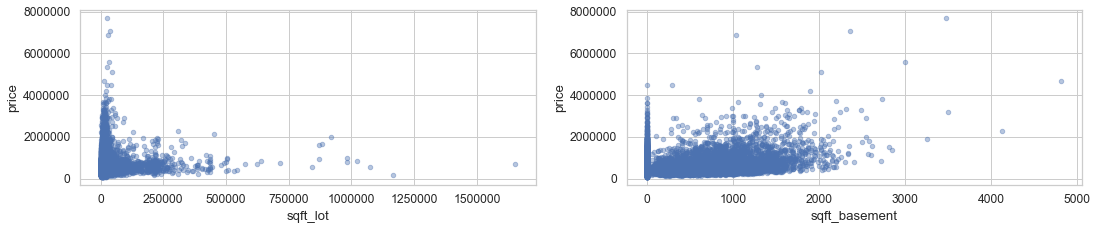

In [814]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_lot','sqft_basement'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

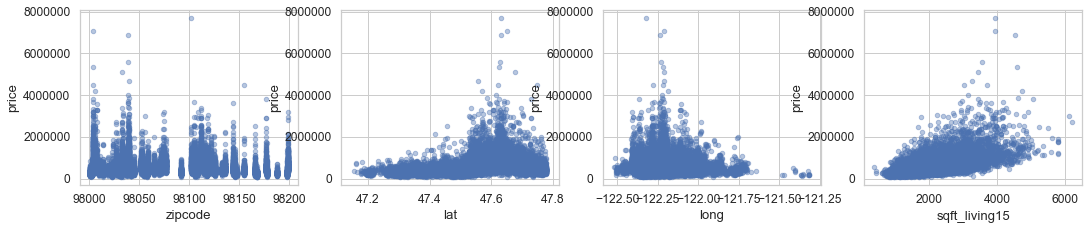

In [815]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['zipcode', 'lat', 'long', 'sqft_living15'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

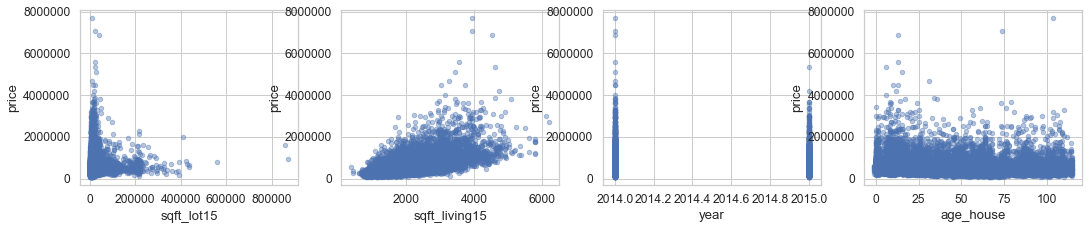

In [816]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot15', 'sqft_living15','year','age_house'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

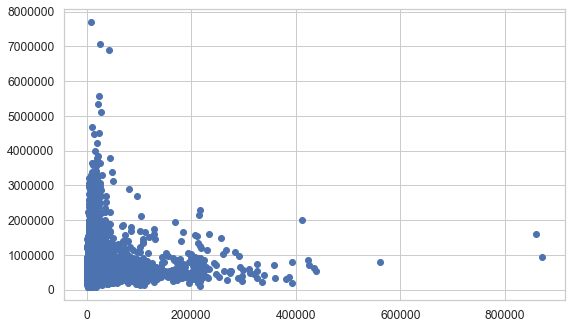

In [817]:
plt.scatter(collin_df['sqft_lot15'], collin_df['price']);

### Normalization
normalization-process of making data distribution more normally distributed.<br>
og gves you a more normal distribution.<br>
remove outliers, consider Z-score, IQR.<br>

In [838]:
#collin_df.columns
collin_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 
              'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year','age_house']
df_norm = collin_df[collin_cols]

Can't check if 'date' is normally distributed as a datetime datatype.<br>

In [839]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

In [841]:
#df_norm['date'].hist()

In [842]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
year             21534 non-null int64
age_house        21534 non-null int64
dtypes: float64(9), int64(11)
memory usage: 3.5 MB


In [822]:
#df_norm['year'] = df_norm['date'].dt.year

In [823]:
#df_norm['year'].value_counts()

In [824]:
#df_norm['yr_built'].value_counts()

In [825]:
#df_norm['age_of_house'].value_counts()

In [826]:
#1761 year=2014, yr_buit= 2015, so getting -number.
#df_norm[df_norm['age_of_house'] < 0]

In [827]:
#df_norm['age_of_house'] = df_norm['year']-df_norm['yr_built']

In [828]:
#df_norm['age_of_house'].describe()

In [829]:
#df_norm.columns

In [830]:
#df_norm['age_of_house'].hist(bins=15);

In [831]:
#df_norm['age_of_house'].mean()

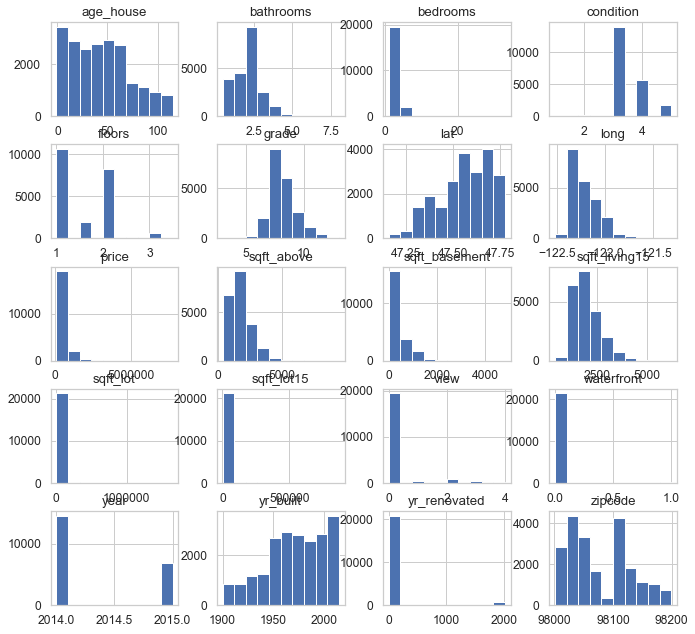

In [843]:
#df_norm.hist(figsize=(13,13));
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_norm.hist(ax = ax);

In [844]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

The categorical variables are: bedrooms, bathrooms, floors, waterfront,view, condition, grade, zipcode.<br>

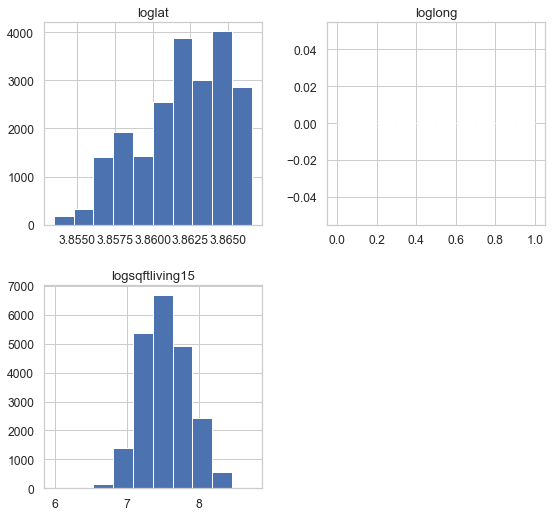

In [852]:
data_log = pd.DataFrame([ ])
#data_log['logage'] = np.log(df_norm['age_house'])
#data_log['logbath'] = np.log(df_norm['bathrooms'])
#data_log['logbed'] = np.log(df_norm['bedrooms'])
data_log['loglat'] = np.log(df_norm['lat'])
data_log['loglong'] = np.log(df_norm['long'])
#data_log['logzipcode'] = np.log(df_norm['zipcode'])
#data_log['logsqftliving'] = np.log(df_norm['sqft_living'])
data_log['logsqftliving15'] = np.log(df_norm['sqft_living15'])
#data_log['logsqftbasement'] = np.log(df_norm['sqft_basement'])
data_log.hist(figsize  = [8, 8]);

Normalization

In [850]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

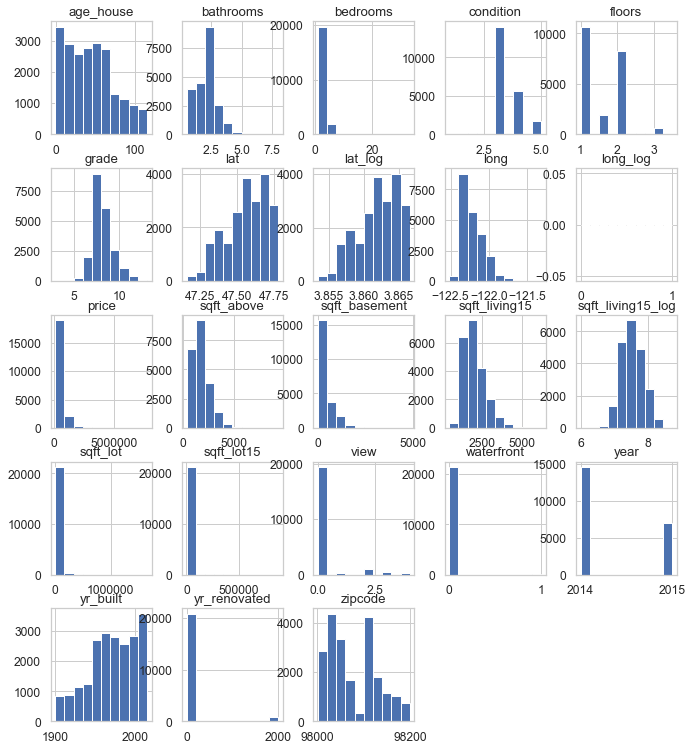

In [853]:
#transforming non-normal features
#let's try to make our data look more normal, and 
#second, let's perform feature scaling to manage the difference in magnitude!
#pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

log_cols =['lat','long','sqft_living15']
def normalize_log(df):
    for col in log_cols:
        #housing_df_1[col+'_log'] = np.log(housing_df_1[col])
        df[col+'_log'] = np.log(df[col])
    df.hist(figsize=(10,12));  
normalize_log(df_norm)        

Standardization<br>
not transforming categorical<br>
x' will have mean  𝜇=0  and  𝜎=1<br>

In [854]:
standard_cols = ['sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log']

df_standard = df_norm[standard_cols]

In [855]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_standard)

In [856]:
kc_scaled = pd.DataFrame(data=scaled_data,columns=df_standard.columns)
kc_scaled.describe().round(3)

,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_log
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.714,-0.649,-2.417,-0.189,-2.918,-2.168,-2.317,-0.444,-2.927
25%,-0.723,-0.649,-0.681,-0.189,-0.642,-0.810,-0.724,-0.281,-0.641
50%,-0.276,-0.649,0.136,-0.189,0.085,-0.114,-0.214,-0.188,0.086
75%,0.509,0.603,0.885,-0.189,0.851,0.632,0.545,-0.098,0.851
max,9.208,10.322,1.498,5.342,1.570,6.388,6.165,31.497,1.566


In [857]:
df_housing.shape

(21534, 23)

In [859]:
type(scaled_data), scaled_data.shape

(numpy.ndarray, (21534, 9))

In [ ]:
#all the means are 0 and all standard deviations are 1
#max will show you where outliers are.  If more than 3


In [860]:
#everythin now ecept 'price' has mean of 0.
kc_scaled['price'] = df_housing['price']
kc_scaled['date'] = df_housing['date']
kc_scaled.describe().round(3)

,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_log,price
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21472.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,539801.045
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,365593.782
min,-1.714,-0.649,-2.417,-0.189,-2.918,-2.168,-2.317,-0.444,-2.927,78000.000
25%,-0.723,-0.649,-0.681,-0.189,-0.642,-0.810,-0.724,-0.281,-0.641,321020.250
50%,-0.276,-0.649,0.136,-0.189,0.085,-0.114,-0.214,-0.188,0.086,450000.000
75%,0.509,0.603,0.885,-0.189,0.851,0.632,0.545,-0.098,0.851,645000.000
max,9.208,10.322,1.498,5.342,1.570,6.388,6.165,31.497,1.566,7700000.000


In [861]:
kc_scaled.head(2)

,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_log,price,date
0,-0.735216,-0.64928,-0.544752,-0.189035,-0.353580,-0.305912,-0.943359,-0.260544,-0.352053,221900.0,10/13/2014
1,0.460832,0.26121,-0.680920,5.276149,1.160948,-0.746467,-0.432488,-0.187566,1.159617,538000.0,12/9/2014


In [862]:
df_filter = kc_scaled.copy()
df_filter.columns

Index(['sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'lat_log', 'price', 'date'],
      dtype='object')

In [866]:
filter_cols = ['sqft_above', 'sqft_basement', 'yr_renovated','long', 
               'sqft_living15', 'sqft_lot15']



In [867]:
#np.abs(kc_scaled['sqft_above'])

In [868]:
df_filter = pd.DataFrame()
for col in filter_cols:
    abs_vals = np.abs(kc_scaled[col])>3
    df_filter[col] = np.where(abs_vals==True,np.nan,kc_scaled[col])#[housing_df_2['sqft_lot15']<3]
df_filter.head()

#True == NaN
#df_filter['check_outliers'] = 

,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15
0,-0.735216,-0.649280,-0.189035,-0.305912,-0.943359,-0.260544
1,0.460832,0.261210,NaN,-0.746467,-0.432488,-0.187566
2,-1.230549,-0.649280,-0.189035,-0.135375,1.070931,-0.172046
3,-0.892273,1.422084,-0.189035,-1.272291,-0.914166,-0.284393
4,-0.131151,-0.649280,-0.189035,1.200501,-0.271929,-0.192556


In [869]:
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [870]:
for col in cat_cols:
    df_filter[col] = df_housing[col].copy()

In [871]:
df_filter.head()

,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,-0.735216,-0.649280,-0.189035,-0.305912,-0.943359,-0.260544,3.0,1.00,1.0,0.0,0.0,3.0,7.0
1,0.460832,0.261210,NaN,-0.746467,-0.432488,-0.187566,3.0,2.25,2.0,0.0,0.0,3.0,7.0
2,-1.230549,-0.649280,-0.189035,-0.135375,1.070931,-0.172046,2.0,1.00,1.0,0.0,0.0,3.0,6.0
3,-0.892273,1.422084,-0.189035,-1.272291,-0.914166,-0.284393,4.0,3.00,1.0,0.0,0.0,5.0,7.0
4,-0.131151,-0.649280,-0.189035,1.200501,-0.271929,-0.192556,3.0,2.00,1.0,0.0,0.0,3.0,8.0


In [872]:
df_filter['price'] = df_housing['price'].copy()

In [873]:
df_filter.head()

,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
0,-0.735216,-0.649280,-0.189035,-0.305912,-0.943359,-0.260544,3.0,1.00,1.0,0.0,0.0,3.0,7.0,221900.0
1,0.460832,0.261210,NaN,-0.746467,-0.432488,-0.187566,3.0,2.25,2.0,0.0,0.0,3.0,7.0,538000.0
2,-1.230549,-0.649280,-0.189035,-0.135375,1.070931,-0.172046,2.0,1.00,1.0,0.0,0.0,3.0,6.0,180000.0
3,-0.892273,1.422084,-0.189035,-1.272291,-0.914166,-0.284393,4.0,3.00,1.0,0.0,0.0,5.0,7.0,604000.0
4,-0.131151,-0.649280,-0.189035,1.200501,-0.271929,-0.192556,3.0,2.00,1.0,0.0,0.0,3.0,8.0,510000.0


In [874]:
print(df_filter.shape)
df_filter.dropna(inplace=True)
print(df_filter.shape)

(21534, 14)
(19653, 14)


In [875]:
try:
    df_filter.dropna(inplace=True)
except:
    print('NaN in the dataframe.')   

In [876]:
df_filter.isna().sum()

sqft_above       0
sqft_basement    0
yr_renovated     0
long             0
sqft_living15    0
sqft_lot15       0
bedrooms         0
bathrooms        0
floors           0
waterfront       0
view             0
condition        0
grade            0
price            0
dtype: int64

In [877]:
df_filter.to_csv('my_df_filter.csv')

In [878]:
df_filter.describe().round(3)

,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
count,19653.000,19653.000,19653.000,19653.000,19653.000,19653.000,19653.000,19653.000,19653.000,19653.000,19653.000,19653.000,19653.000,19653.000
mean,-0.080,-0.049,-0.189,-0.057,-0.072,-0.124,3.372,2.114,1.494,0.007,0.235,3.411,7.656,539514.049
std,0.883,0.906,0.000,0.918,0.902,0.350,0.929,0.768,0.540,0.083,0.769,0.651,1.169,362552.851
min,-1.714,-0.649,-0.189,-2.132,-2.228,-0.444,1.000,0.500,1.000,0.000,0.000,1.000,3.000,78000.000
25%,-0.735,-0.649,-0.189,-0.825,-0.739,-0.284,3.000,1.750,1.000,0.000,0.000,3.000,7.000,323000.000
50%,-0.312,-0.649,-0.189,-0.178,-0.257,-0.193,3.000,2.250,1.500,0.000,0.000,3.000,7.000,450000.000
75%,0.425,0.512,-0.189,0.561,0.458,-0.112,4.000,2.500,2.000,0.000,0.000,4.000,8.000,645000.000
max,2.998,2.993,-0.189,2.977,2.998,2.975,33.000,8.000,3.500,1.000,4.000,5.000,13.000,7700000.000


In [879]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [880]:
cols = df_filter.drop(['price'],axis=1).columns
str_cols = ' + '.join(cols)
str_cols

'sqft_above + sqft_basement + yr_renovated + long + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + waterfront + view + condition + grade'

In [881]:
formula = 'price~'+str_cols
formula

'price~sqft_above + sqft_basement + yr_renovated + long + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + waterfront + view + condition + grade'

In [882]:
model = smf.ols(formula=formula, data=df_filter).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1970.
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:30:01   Log-Likelihood:            -2.7170e+05
No. Observations:               19653   AIC:                         5.434e+05
Df Residuals:                   19640   BIC:                         5.435e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.096e+06   1.65e+04    -66.288      0.000   -1.13e+06   -1.06e+06
sqft_above     -112.2902   3074.999     -0.037      0.971   -6139.549    5914.969
sqft_basement  1758.4770   2116.503      0.831      0.406   -2390.047    5907.001
yr_renovated   2.072e+05   3125.676     66.288      0.000    2.01e+05    2.13e+05
long          -1602.7175   2178.695     -0.736      0.462   -5873.144    2667.709
sqft_living15   318.6405   3079.112      0.103      0.918   -5716.680    6353.961
sqft_lot15     3354.3123   5342.208      0.628      0.530   -7116.868    1.38e+04
bedrooms       1.322e+04   2208.847      5.985      0.000    8890.847    1.75e+04
bathrooms      6.426e+04   3488.138     18.422      0.000    5.74e+04    7.11e+04
floors        -3.222e+04   3939.214     -8.181      0.000   -3.99e+04   -2.45e+04
waterfront     6.069e+05   2.29e+04     26.546      0.000    5.62e+05    6.52e+05
view            8.08e+04   2548.301     31.706      0.000    7.58e+04    8.58e+04
condition      6.107e+04   2795.221     21.847      0.000    5.56e+04    6.65e+04
grade          1.713e+05   2075.698     82.521      0.000    1.67e+05    1.75e+05
==============================================================================
Omnibus:                    16200.713   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1429735.535
Skew:                           3.429   Prob(JB):                         0.00
Kurtosis:                      44.218   Cond. No.                     1.87e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.14e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### QQ-plot

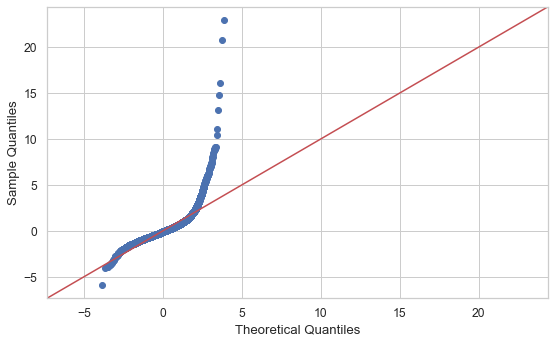

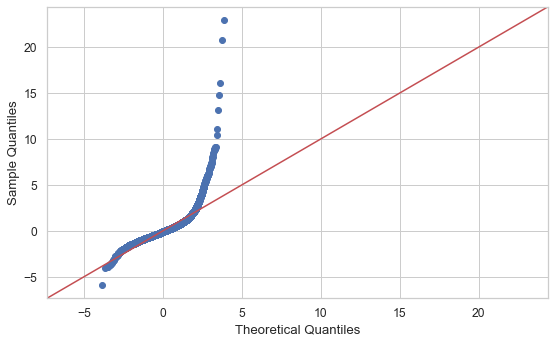

In [883]:
resids = model.resid
import scipy.stats as stats

sm.graphics.qqplot(resids,stats.norm,line='45',fit=True)

## Removing High P value variables

In [884]:
drop_cols = [col for col in df_housing.columns if 'sqft' in col]
drop_cols.append('price')
drop_cols.append('long')

drop_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'price',
 'long']

In [885]:
df = df_filter.copy()
for col in drop_cols:
    try:
        df.drop(col,axis=1,inplace=True)
    except:
        print(f"Couldnt drop {col}")

Couldnt drop sqft_living
Couldnt drop sqft_lot


In [886]:
cols =df.columns
str_cols = ' + '.join(cols)
str_cols

'yr_renovated + bedrooms + bathrooms + floors + waterfront + view + condition + grade'

In [887]:
formula = 'price~'+str_cols
formula

'price~yr_renovated + bedrooms + bathrooms + floors + waterfront + view + condition + grade'

In [888]:
model = smf.ols(formula=formula, data=df_filter).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     3377.
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:54:40   Log-Likelihood:            -2.7170e+05
No. Observations:               19653   AIC:                         5.434e+05
Df Residuals:                   19645   BIC:                         5.435e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.096e+06   1.65e+04    -66.378      0.000   -1.13e+06   -1.06e+06
yr_renovated  2.073e+05   3122.666     66.378      0.000    2.01e+05    2.13e+05
bedrooms      1.323e+04   2208.221      5.991      0.000    8901.822    1.76e+04
bathrooms      6.42e+04   3486.934     18.411      0.000    5.74e+04     7.1e+04
floors       -3.242e+04   3932.805     -8.243      0.000   -4.01e+04   -2.47e+04
waterfront    6.071e+05   2.29e+04     26.562      0.000    5.62e+05    6.52e+05
view          8.081e+04   2547.875     31.715      0.000    7.58e+04    8.58e+04
condition     6.116e+04   2794.166     21.888      0.000    5.57e+04    6.66e+04
grade         1.713e+05   2075.389     82.539      0.000    1.67e+05    1.75e+05
==============================================================================
Omnibus:                    16201.678   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1429641.793
Skew:                           3.430   Prob(JB):                         0.00
Kurtosis:                      44.217   Cond. No.                     1.82e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.38e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [889]:
def find_outliers(col):
    """Use scipy to calcualte absoliute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

idx = find_outliers(df_filter['price'])
idx

0        False
2        False
3        False
4        False
6        False
         ...  
21529    False
21530    False
21531    False
21532    False
21533    False
Length: 19653, dtype: bool

In [890]:
display(df_filter.loc[idx==True].describe().round(3))
display(df_filter.loc[idx==False].describe().round(3))
df = df_filter.loc[idx==False]

,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
count,373.000,373.000,373.000,373.000,373.000,373.000,373.000,373.000,373.000,373.000,373.000,373.000,373.000,373.000
mean,-0.042,0.014,-0.189,-0.077,-0.048,-0.148,4.239,3.569,1.873,0.164,1.716,3.507,10.389,2243378.016
std,0.900,0.976,0.000,0.922,0.937,0.285,0.921,0.962,0.480,0.370,1.680,0.728,1.158,720715.265
min,-1.629,-0.649,-0.189,-2.118,-2.228,-0.435,2.000,1.750,1.000,0.000,0.000,2.000,7.000,1630000.000
25%,-0.687,-0.649,-0.189,-0.874,-0.768,-0.277,4.000,3.000,2.000,0.000,0.000,3.000,10.000,1770000.000
50%,-0.264,-0.649,-0.189,-0.192,-0.155,-0.193,4.000,3.500,2.000,0.000,2.000,3.000,10.000,1990000.000
75%,0.449,0.671,-0.189,0.504,0.502,-0.125,5.000,4.000,2.000,0.000,3.000,4.000,11.000,2470000.000
max,2.829,2.856,-0.189,2.721,2.968,2.265,8.000,8.000,3.500,1.000,4.000,5.000,13.000,7700000.000


,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
count,19280.000,19280.000,19280.000,19280.000,19280.000,19280.000,19280.000,19280.000,19280.000,19280.000,19280.000,19280.000,19280.000,19280.000
mean,-0.081,-0.050,-0.189,-0.056,-0.072,-0.124,3.355,2.086,1.486,0.004,0.206,3.409,7.603,506550.291
std,0.883,0.905,0.000,0.917,0.901,0.351,0.921,0.736,0.539,0.062,0.710,0.649,1.105,258282.065
min,-1.714,-0.649,-0.189,-2.132,-2.228,-0.444,1.000,0.500,1.000,0.000,0.000,1.000,3.000,78000.000
25%,-0.735,-0.649,-0.189,-0.825,-0.739,-0.284,3.000,1.500,1.000,0.000,0.000,3.000,7.000,320000.000
50%,-0.324,-0.649,-0.189,-0.178,-0.257,-0.193,3.000,2.250,1.000,0.000,0.000,3.000,7.000,445800.000
75%,0.425,0.512,-0.189,0.563,0.458,-0.112,4.000,2.500,2.000,0.000,0.000,4.000,8.000,626775.000
max,2.998,2.993,-0.189,2.977,2.998,2.975,33.000,7.500,3.500,1.000,4.000,5.000,12.000,1620000.000


In [891]:
cols =df.columns
str_cols = ' + '.join(cols)
str_cols

'sqft_above + sqft_basement + yr_renovated + long + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + waterfront + view + condition + grade + price'

In [892]:
formula = 'price~'+str_cols
formula

'price~sqft_above + sqft_basement + yr_renovated + long + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + waterfront + view + condition + grade + price'

In [893]:
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.523e+32
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:01:36   Log-Likelihood:             3.8877e+05
No. Observations:               19280   AIC:                        -7.775e+05
Df Residuals:                   19266   BIC:                        -7.774e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.382e-10   3.27e-11      4.232      0.000    7.42e-11    2.02e-10
sqft_above    -1.928e-10   5.38e-12    -35.826      0.000   -2.03e-10   -1.82e-10
sqft_basement   4.32e-12   3.71e-12      1.164      0.244   -2.95e-12    1.16e-11
yr_renovated  -2.319e-11   6.17e-12     -3.756      0.000   -3.53e-11   -1.11e-11
long          -1.228e-11   3.81e-12     -3.223      0.001   -1.97e-11   -4.81e-12
sqft_living15  6.185e-11   5.39e-12     11.470      0.000    5.13e-11    7.24e-11
sqft_lot15    -2.183e-11   9.32e-12     -2.343      0.019   -4.01e-11   -3.57e-12
bedrooms       2.683e-11   3.88e-12      6.911      0.000    1.92e-11    3.44e-11
bathrooms     -9.095e-12   6.23e-12     -1.459      0.145   -2.13e-11    3.12e-12
floors          2.91e-11   6.94e-12      4.195      0.000    1.55e-11    4.27e-11
waterfront     1.746e-10    5.2e-11      3.361      0.001    7.28e-11    2.76e-10
view          -1.637e-11   4.75e-12     -3.444      0.001   -2.57e-11   -7.05e-12
condition     -1.819e-12   4.99e-12     -0.365      0.715   -1.16e-11    7.95e-12
grade         -4.775e-11    4.4e-12    -10.857      0.000   -5.64e-11   -3.91e-11
price             1.0000    1.7e-17   5.88e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     1341.150   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2038.174
Skew:                          -0.570   Prob(JB):                         0.00
Kurtosis:                       4.113   Cond. No.                     1.13e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.89e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Explore House Values by Age

In [ ]:
df_housing.columns

In [ ]:
df_housing.columns
df_hous_cols = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df_vis = df_housing[df_hous_cols]

In [ ]:
df_vis.info()

In [ ]:
df_vis.columns

In [ ]:
#house_age = housing_df.copy()
df_vis['year'] = df_vis['date'].dt.year

In [ ]:
df_vis['age'] = df_vis['year']-df_vis['yr_built'] 
df_vis.loc[df_vis['age']> 11]

### Factors that Impact the Price of a House

In [ ]:
#Explore Home values by age
df_vis['decades'] = abs(df_vis['age'] // 10)
to_plot = df_vis.groupby('decades').price.mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Median Value of Homes')
plt.title('Average Home Values by Home Age');

How does the number of bedrooms in homes have an impact on the price of a home?  What kind of relationship is there between home prices and number of bedrooms.  A statistical analysis shows that the average number
of bedrooms in the dataset is 3.37 bedrooms.  However, when we check this relationship the average number of bedrooms 
does not mean the highest price for a home neither does the highest nubmer og bedrooms.  Based on the scatter plot below it shows that homes with 5 bedrooms consituteded the highest price values.  Still basic logic would tend to show that higher the number of bedrooms the higher hte price of the home.  It actually shows the opposite, in this dataset, after 5 bedrooms it shows that the price of the homes started to decrease. pretty drastcially.  For example, it showed the homes with 6 bedrooms the median price was in the range below $200,000.<br>
Of course my analysis is made on broad assertions working with just these 2 columns.  I have not account for any data which would have an impact with things such as hte overall condition of the home, ie, perhaps home with more bedrooms have not been renovated or maintained properly over the years.<br>

In [ ]:
df_vis['bedrooms'].describe()

In [ ]:
plt.scatter(df_vis['bedrooms'], df_vis['price']);

In [ ]:
df_vis['year']

In [ ]:
pivot = df_vis.pivot_table(index='year', values='price', aggfunc=np.median)
pivot

Homes prices based on zipcode. The zip code with the highest home value is 98039.  The zipcide with the lowest home prices is 98002.<br>

In [ ]:
plt.figure(figsize=(14,6));
df_vis['price'].groupby(df_vis['zipcode']).median().sort_values().plot(kind='bar');